## Top 20 words of each News category

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

### Read true.csv file and label it with 1

In [7]:
true_df = pd.read_csv(r"True.csv", sep=',')
true_df['label'] = 1
true_df.sample(5)

,title,text,subject,date,label
3153,Russia media group that angered Kremlin is sold,MOSCOW (Reuters) - A Russian media group which...,politicsNews,"June 16, 2017",1
9398,State Department was not doing enough on email...,WASHINGTON (Reuters) - Top U.S. State Departme...,politicsNews,"May 25, 2016",1
12777,UK's Brexit minister says today is a big step ...,LONDON (Reuters) - Brexit minister David Davis...,worldnews,"December 8, 2017",1
4458,Contentious cases await Trump's U.S. high cour...,WASHINGTON (Reuters) - If confirmed as expecte...,politicsNews,"April 5, 2017",1
5201,Kellyanne Conway 'inadvertently' plugged Ivank...,WASHINGTON (Reuters) - The White House told a ...,politicsNews,"March 1, 2017",1


### Read fake.csv file and label it with 0

In [8]:
fake_df = pd.read_csv(r"Fake.csv", sep=',') 
fake_df['label'] = 0
fake_df.sample(5)

,title,text,subject,date,label
4721,Fox News Steals Greta Van Susteren’s Personal...,Greta van Susteren left Fox News abruptly rece...,News,"September 8, 2016",0
3382,Trump Whines Like A Baby In Defense Of Russia...,Donald Trump sure is whining a lot in defense ...,News,"December 16, 2016",0
8556,Florida Governor Rick Scott Tax Cut His Way I...,Rick Scott has been governor of Florida for ju...,News,"January 24, 2016",0
14404,"Man Who Vandalized Mosque, Placed Bacon On Doo...",Sounds about right. Thank goodness for the new...,politics,"Feb 27, 2016",0
14869,Deja Vu: Hillary Wants $275 Billion For Shovel...,Wait one damn minute! Didn t we do this alread...,politics,"Nov 30, 2015",0


### Combine true and fake news in one dataframe

In [9]:
all_news_df = pd.concat([true_df, fake_df], ignore_index=True)
all_news_df.sample(10)

,title,text,subject,date,label
19601,Poll gives New Zealand's Nationals nine point ...,WELLINGTON (Reuters) - New Zealand s ruling Na...,worldnews,"September 20, 2017",1
12658,Britain's foreign minister to meet Iran's pres...,LONDON (Reuters) - Britain s foreign minister ...,worldnews,"December 9, 2017",1
31184,"WOW! CONSERVATIVE SINGER KAYA JONES, Who Recei...","Kaya Jones, aka Chrystal Neria, the former mem...",politics,"Oct 2, 2017",0
33035,HILARIOUS! LIBERALS STUNNED When Republican Gu...,"On Saturday, MSNBC s Joy Reid repeatedly attem...",politics,"Feb 19, 2017",0
22155,"Trump Goes On Stunningly Bigoted Rant, Says H...",We always knew that the Trump Administration w...,News,"July 26, 2017",0
30314,Maine’s Tea Party Governor Just Went On A Rac...,Worst governor in the United States Paul LePag...,News,"January 7, 2016",0
32368,Congrats To Nasty Little Globalist And Bilderb...,Paul Joseph Watson nails it in this look at th...,politics,"May 7, 2017",0
26085,"Veteran Doesn’t Want Your Thanks, He Wants Yo...",Marine Corps Veteran Frank Biggio appreciates ...,News,"September 12, 2016",0
219,Nearly half of Americans still oppose Republic...,WASHINGTON/NEW YORK (Reuters) - As Republicans...,politicsNews,"December 11, 2017",1
28538,WATCH: Bernie Sanders Invokes Holocaust To De...,Bernie Sanders is not one to mince words when ...,News,"April 3, 2016",0


### Partition the Dataframe into sub-dataframes according to the news subject

In [10]:
df_groups = all_news_df.groupby('subject')
print("The available subjects are:")
for name, group in df_groups:
    print(name)

The available subjects are:
Government News
Middle-east
News
US_News
left-news
politics
politicsNews
worldnews


### Produce a Frequency-Term Table out of the datafarame
### Produce Frequent Itemsets
### plot the top 20 popular words

In [11]:

def getTop20WordsOfNewsSubject(name, group):
    vectorizer = CountVectorizer(stop_words='english', binary=True)
    matrix = vectorizer.fit_transform(group['title'] + ' ' + group['text'])
    word_counts = matrix.sum(axis=0).tolist()[0]
    features = vectorizer.get_feature_names_out()
    word_freq = dict(zip(features, word_counts))
    top_20_freq_items = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
    df_top20 = pd.DataFrame(top_20_freq_items, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 8))
    plt.barh(df_top20['Word'], df_top20['Frequency'])
    plt.xlabel('Fequency')
    plt.ylabel('Words')
    plt.title(f'Top 20 Frequent Words of News with ({name}) subject')
    plt.gca().invert_yaxis() 
    plt.tight_layout()
    plt.show()

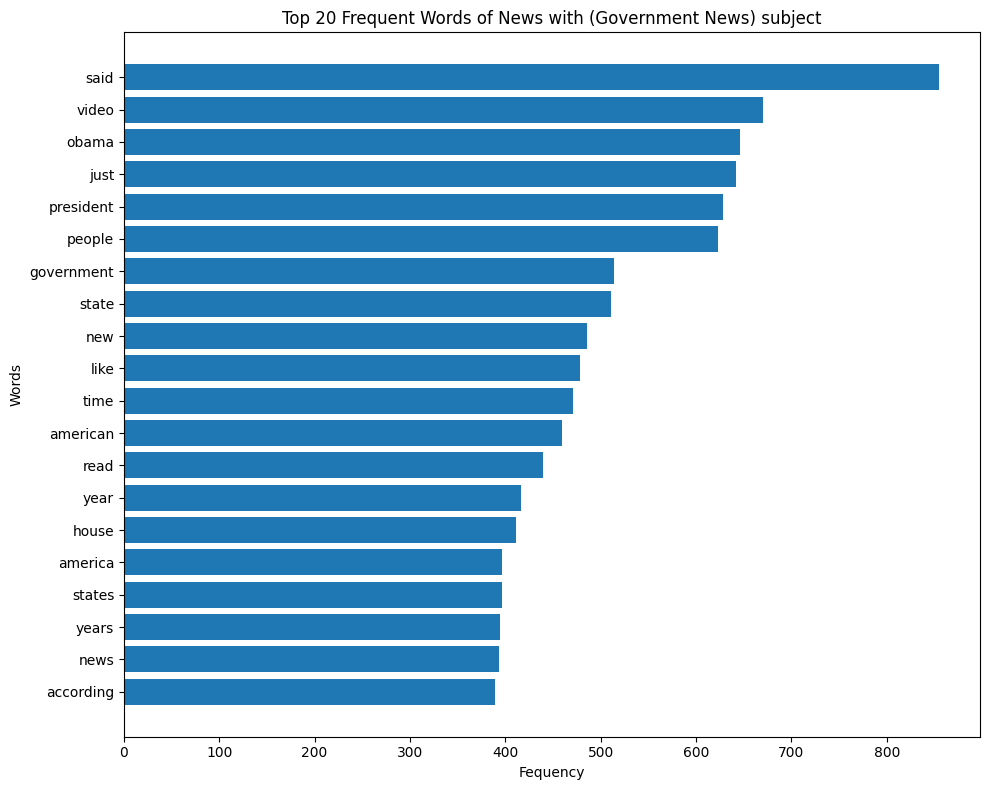

In [12]:
getTop20WordsOfNewsSubject("Government News", df_groups.get_group("Government News"))

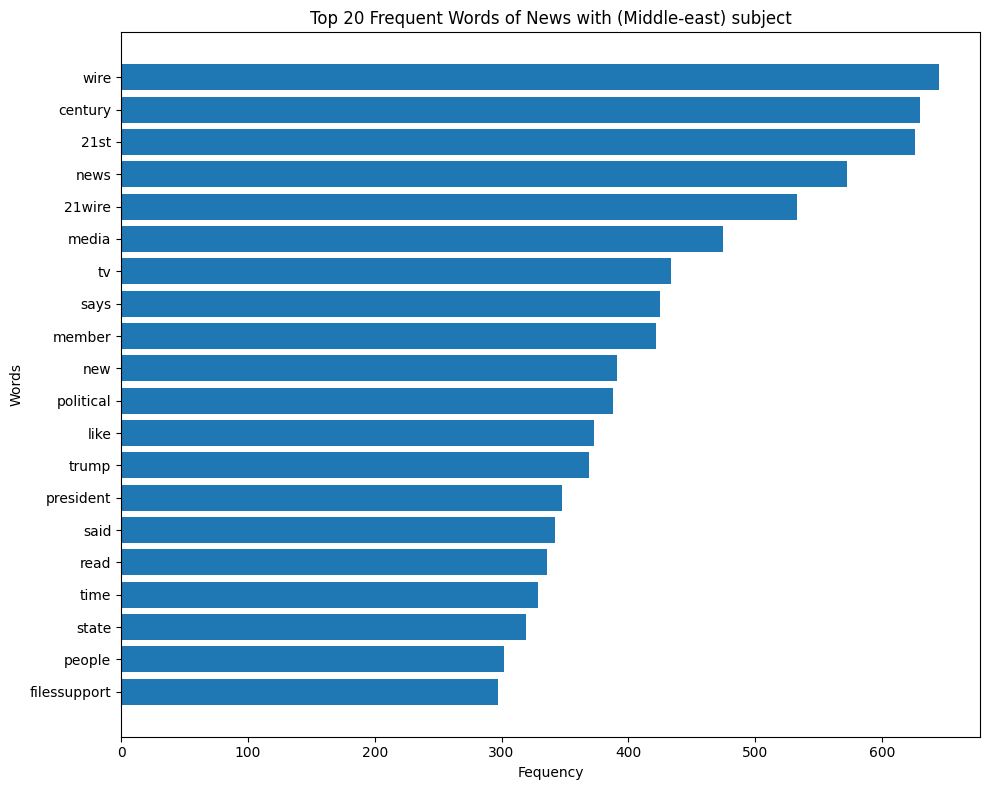

In [13]:
getTop20WordsOfNewsSubject("Middle-east", df_groups.get_group("Middle-east"))

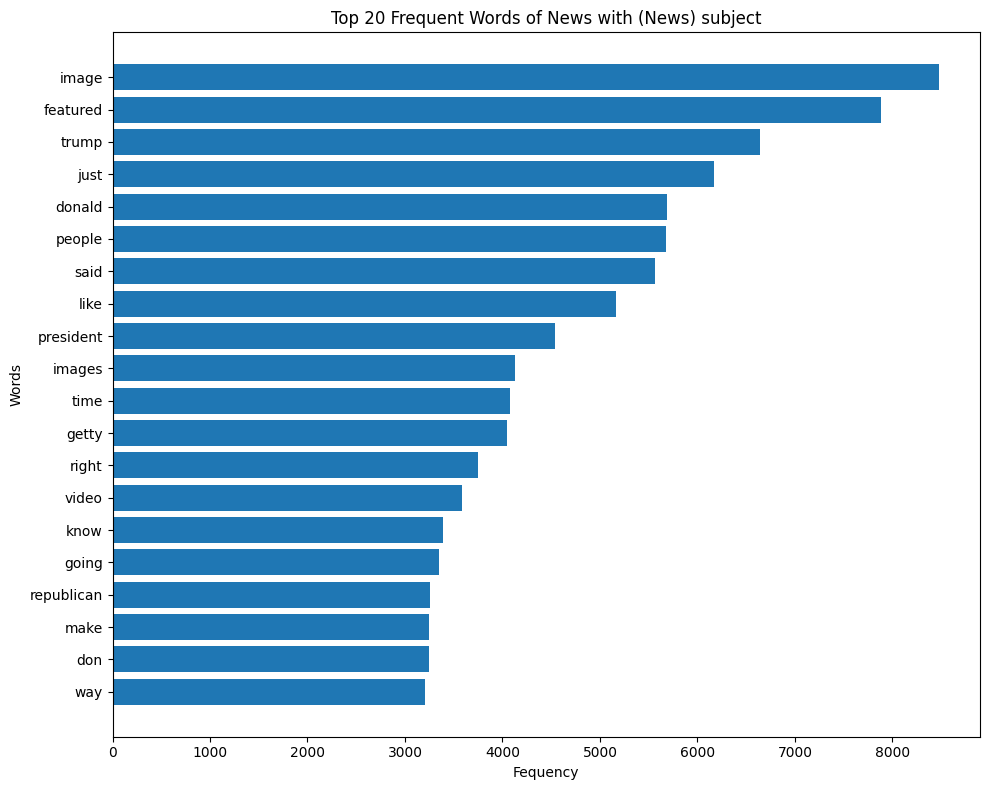

In [14]:
getTop20WordsOfNewsSubject("News", df_groups.get_group("News"))

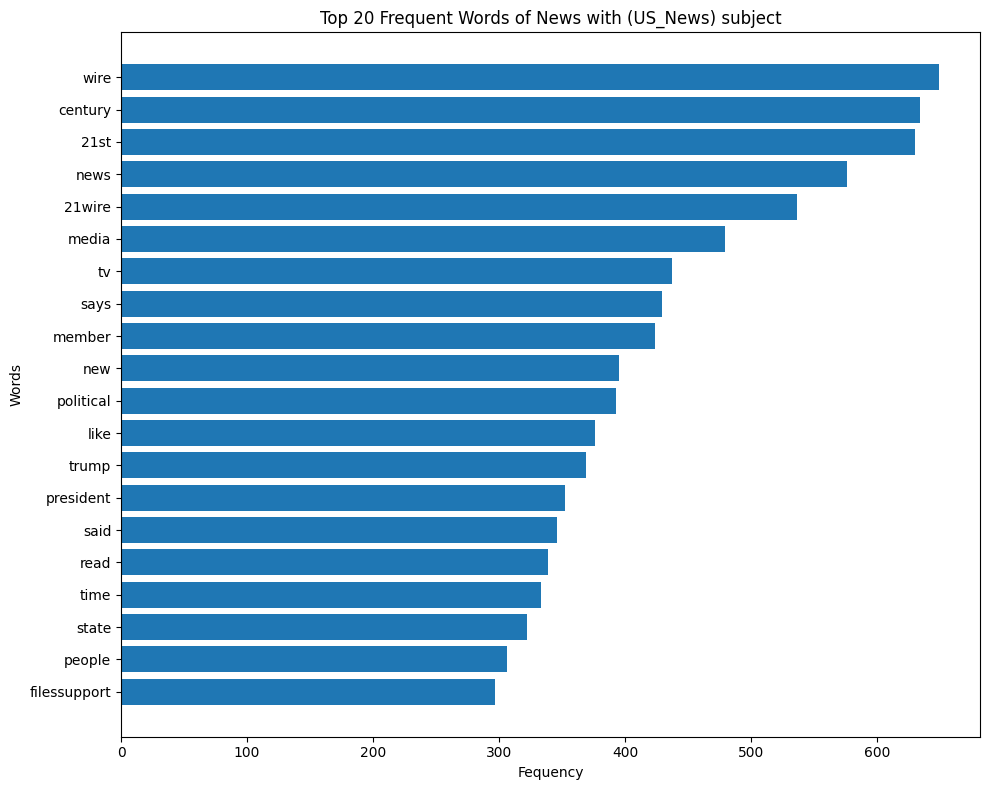

In [15]:
getTop20WordsOfNewsSubject("US_News", df_groups.get_group("US_News"))

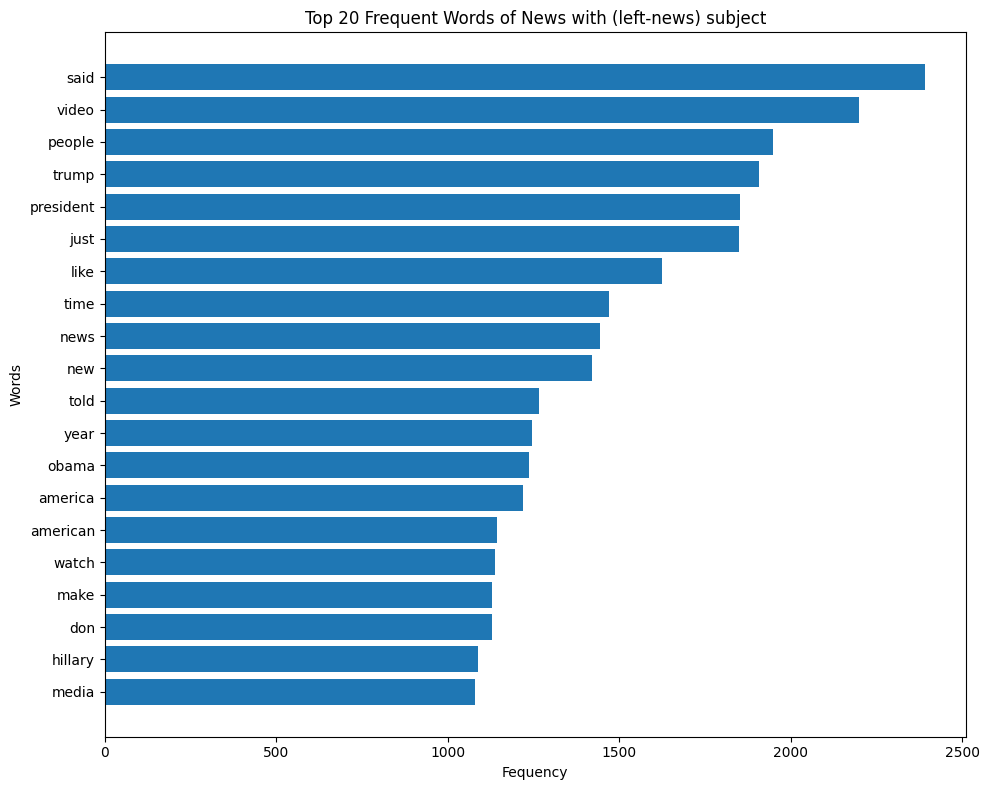

In [16]:
getTop20WordsOfNewsSubject("left-news", df_groups.get_group("left-news"))

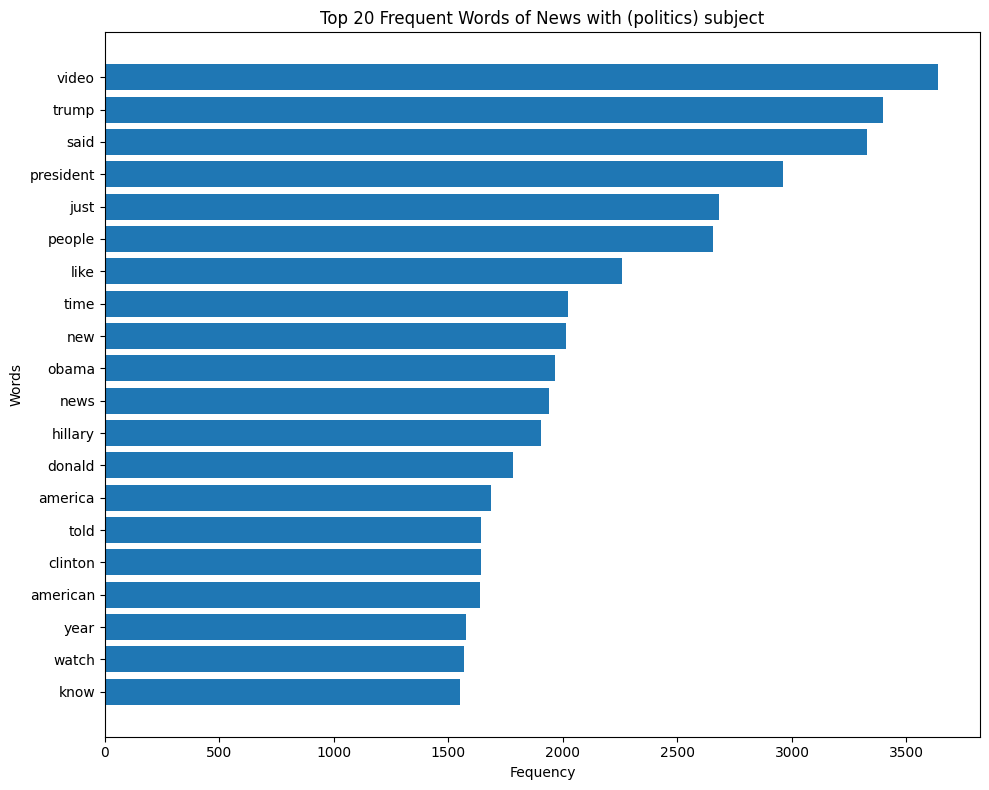

In [17]:
getTop20WordsOfNewsSubject("politics", df_groups.get_group("politics"))

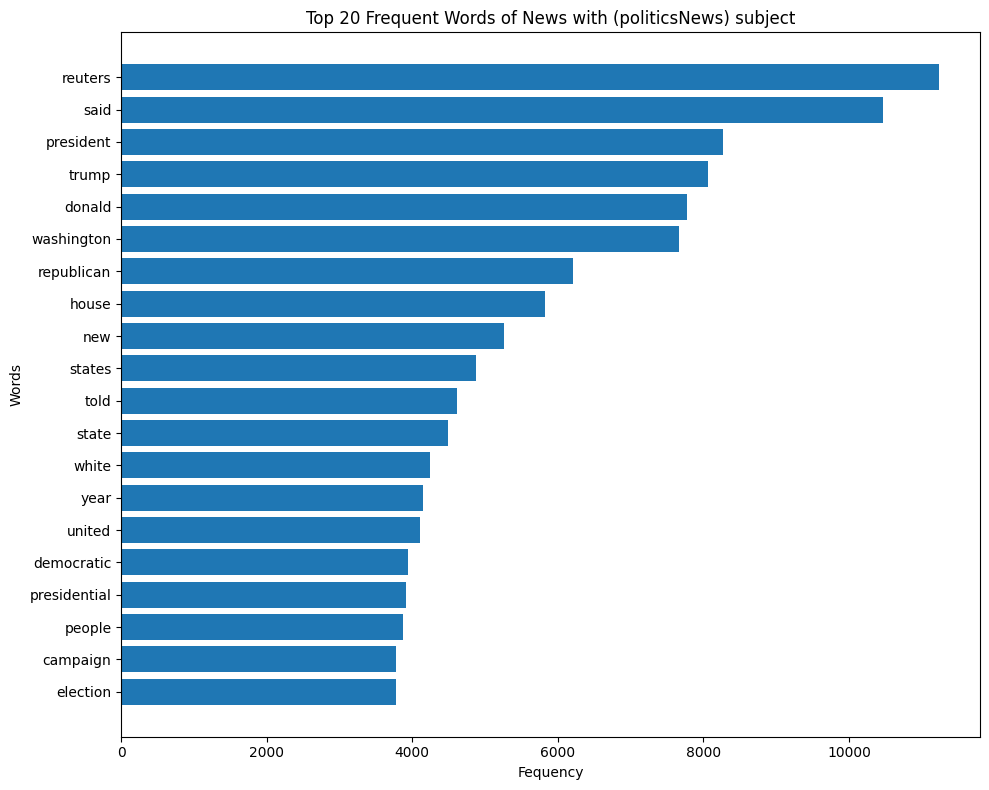

In [18]:
getTop20WordsOfNewsSubject("politicsNews", df_groups.get_group("politicsNews"))

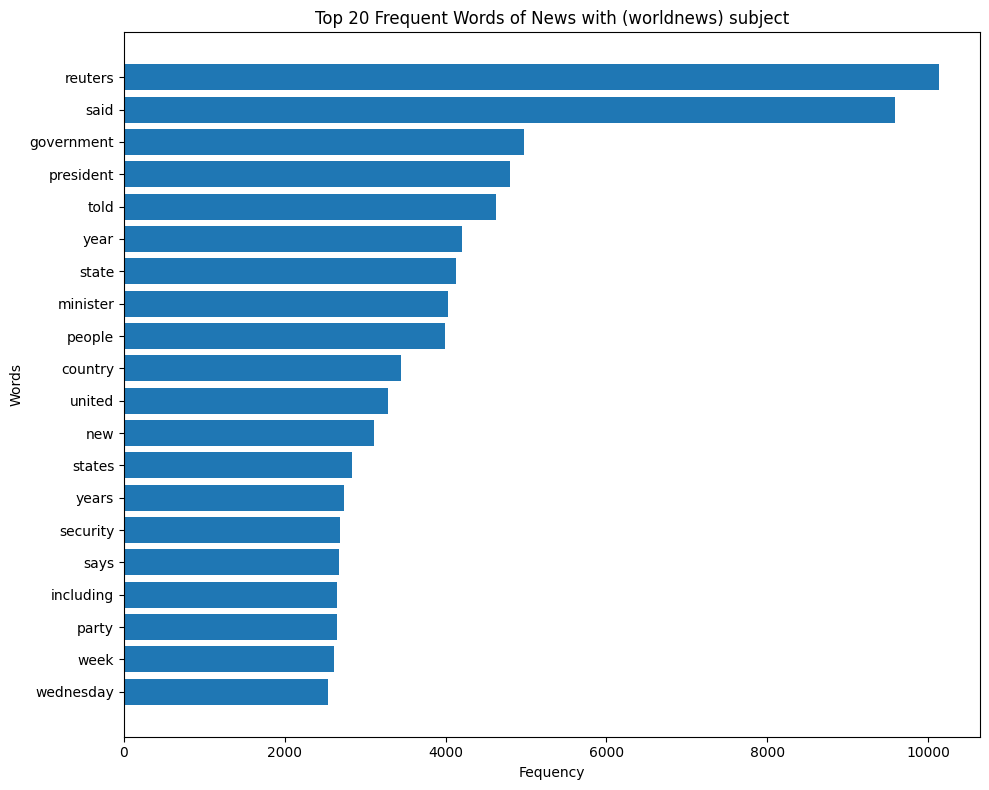

In [19]:
getTop20WordsOfNewsSubject("worldnews", df_groups.get_group("worldnews"))

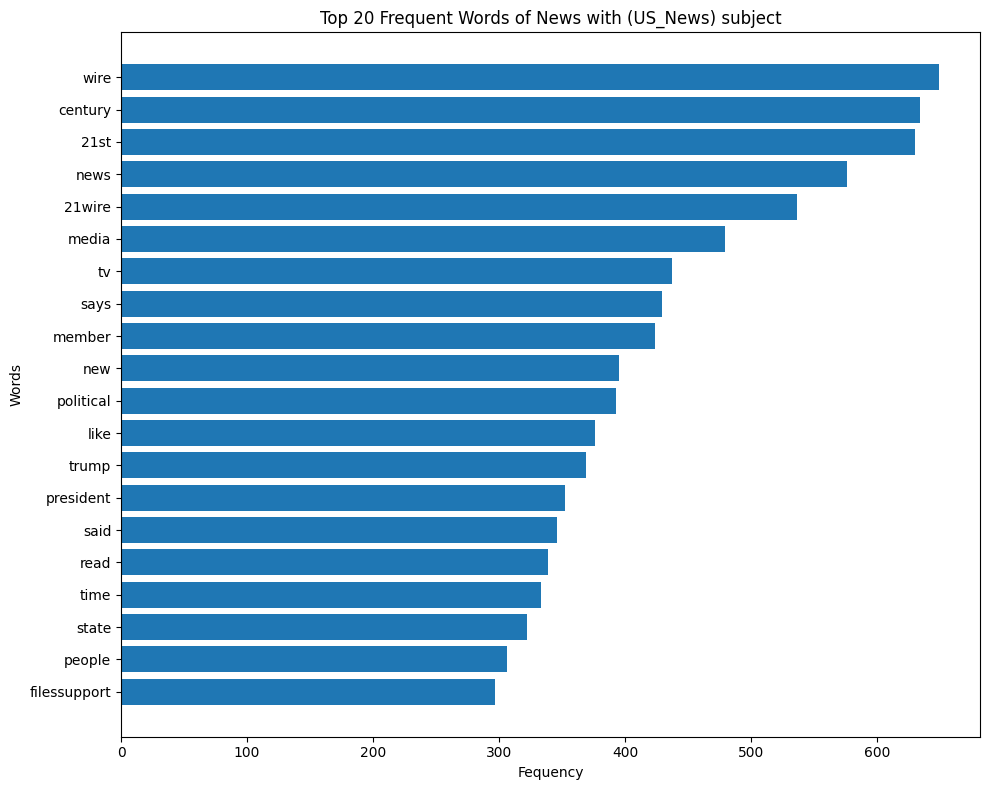

In [20]:
getTop20WordsOfNewsSubject("US_News", df_groups.get_group("US_News"))